# Breast Cancer Diagnosis with Machine Learning

##  This data describes the Wisconsin Diagnostic Breast Cancer (WDBC) dataset, which includes data from breast cancer diagnoses based on fine needle aspirates (FNA). Here’s the analysis strategy we are going to follow:

1. **Data Understanding and Pre-processing:**
   - Verify the data quality and check if any preprocessing steps such as scaling or normalization are needed, particularly since all features are real-valued and computed from digital images.
   - Ensure that there are no missing values or outliers that could skew the analysis.

2. **Feature Examination:**
   - Conduct exploratory data analysis (EDA) to understand the distribution of each feature, including the mean, standard error, and worst (largest) values of the characteristics of cell nuclei.
   - Examine correlations between features to identify any multicollinearity issues, which might impact model performance.

3. **Dimensionality Reduction:**
   - Consider applying dimensionality reduction techniques such as Principal Component Analysis (PCA) to reduce the number of features and possibly improve model performance by eliminating noise and redundancy in the data.

4. **Model Building:**
   - Given the dataset’s previous use in machine learning to classify diagnoses as benign or malignant, you could apply supervised learning classification models. Suitable models might include Logistic Regression, Support Vector Machines, Random Forests, and Gradient Boosting Machines.
   - Use k-fold cross-validation to evaluate model performance robustly, using stratified folds for the class imbalance.

5. **Model Evaluation and Selection:**
   - Evaluate models based on appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
   - If any model overfits or underfits, consider tuning hyperparameters or revisiting the feature engineering step.

6. **Interpretation and Reporting:**
   - Interpret the model results to understand the impact of different features on the prediction of breast cancer diagnosis. Feature importance derived from tree-based models can be particularly insightful.
   - Prepare a comprehensive report detailing the methodologies used, model evaluation, and insights from the feature importance and model predictions.



# Step 1: Data Understanding and Pre-processing

In [78]:
import pandas as pd

# Load the data
data = pd.read_csv("D:\ACADEMIA\Research\IDEMU\ML and AI\data.csv")

# Display basic information and the first few rows of the dataset
data.info()
data.head()
data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

# Step 2: Exploratory Data Analysis (EDA)
We'll analyze the distribution of features and the target variable. This includes visualizing the distributions of features and checking the balance between the two classes (benign and malignant)

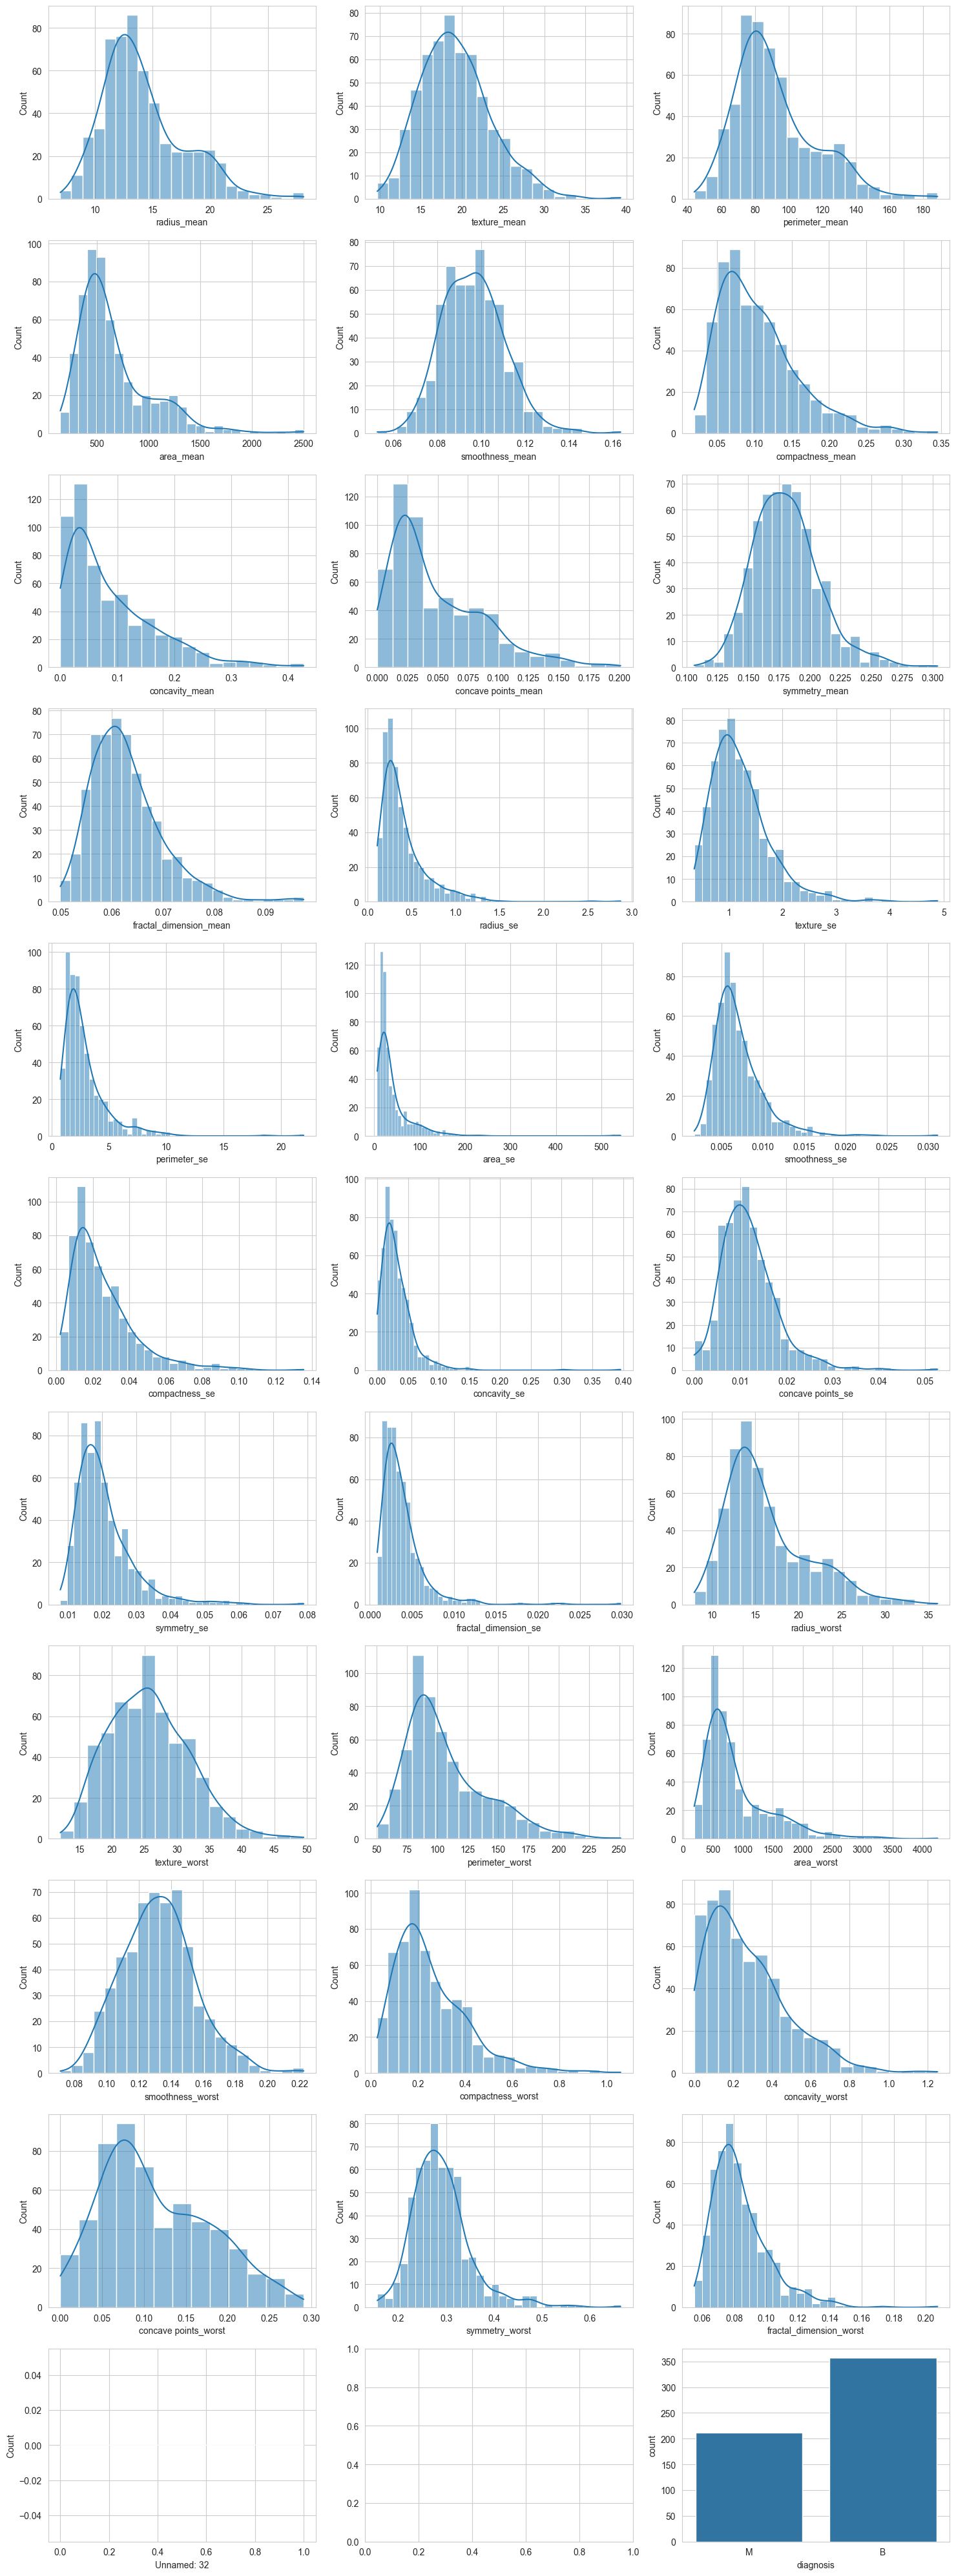

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot distributions of each feature
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 40))
for idx, feature in enumerate(data.columns[2:]):  # Skipping ID and diagnosis
    sns.histplot(data[feature], ax=axes[idx // 3, idx % 3], kde=True)
plt.tight_layout()

# Plot the distribution of the diagnosis
sns.countplot(x='diagnosis', data=data)
plt.show()


In [80]:
#check for missing values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [81]:
#drop unnamed column
data.drop('Unnamed: 32', axis=1, inplace=True)


In [82]:
#check for duplicates
data.duplicated().sum()

0

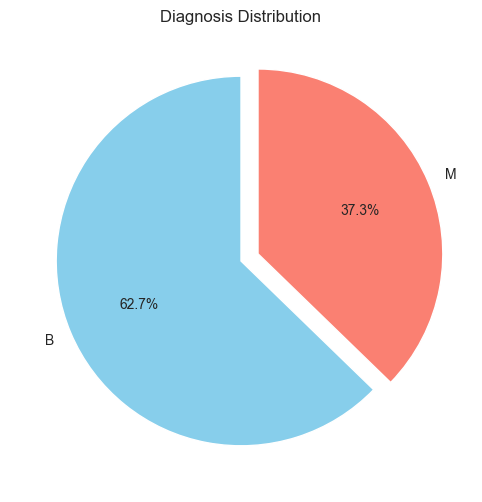

In [83]:
#plot diagnosis percentage
plt.figure(figsize=(10, 6))
data['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['skyblue', 'salmon'])
plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

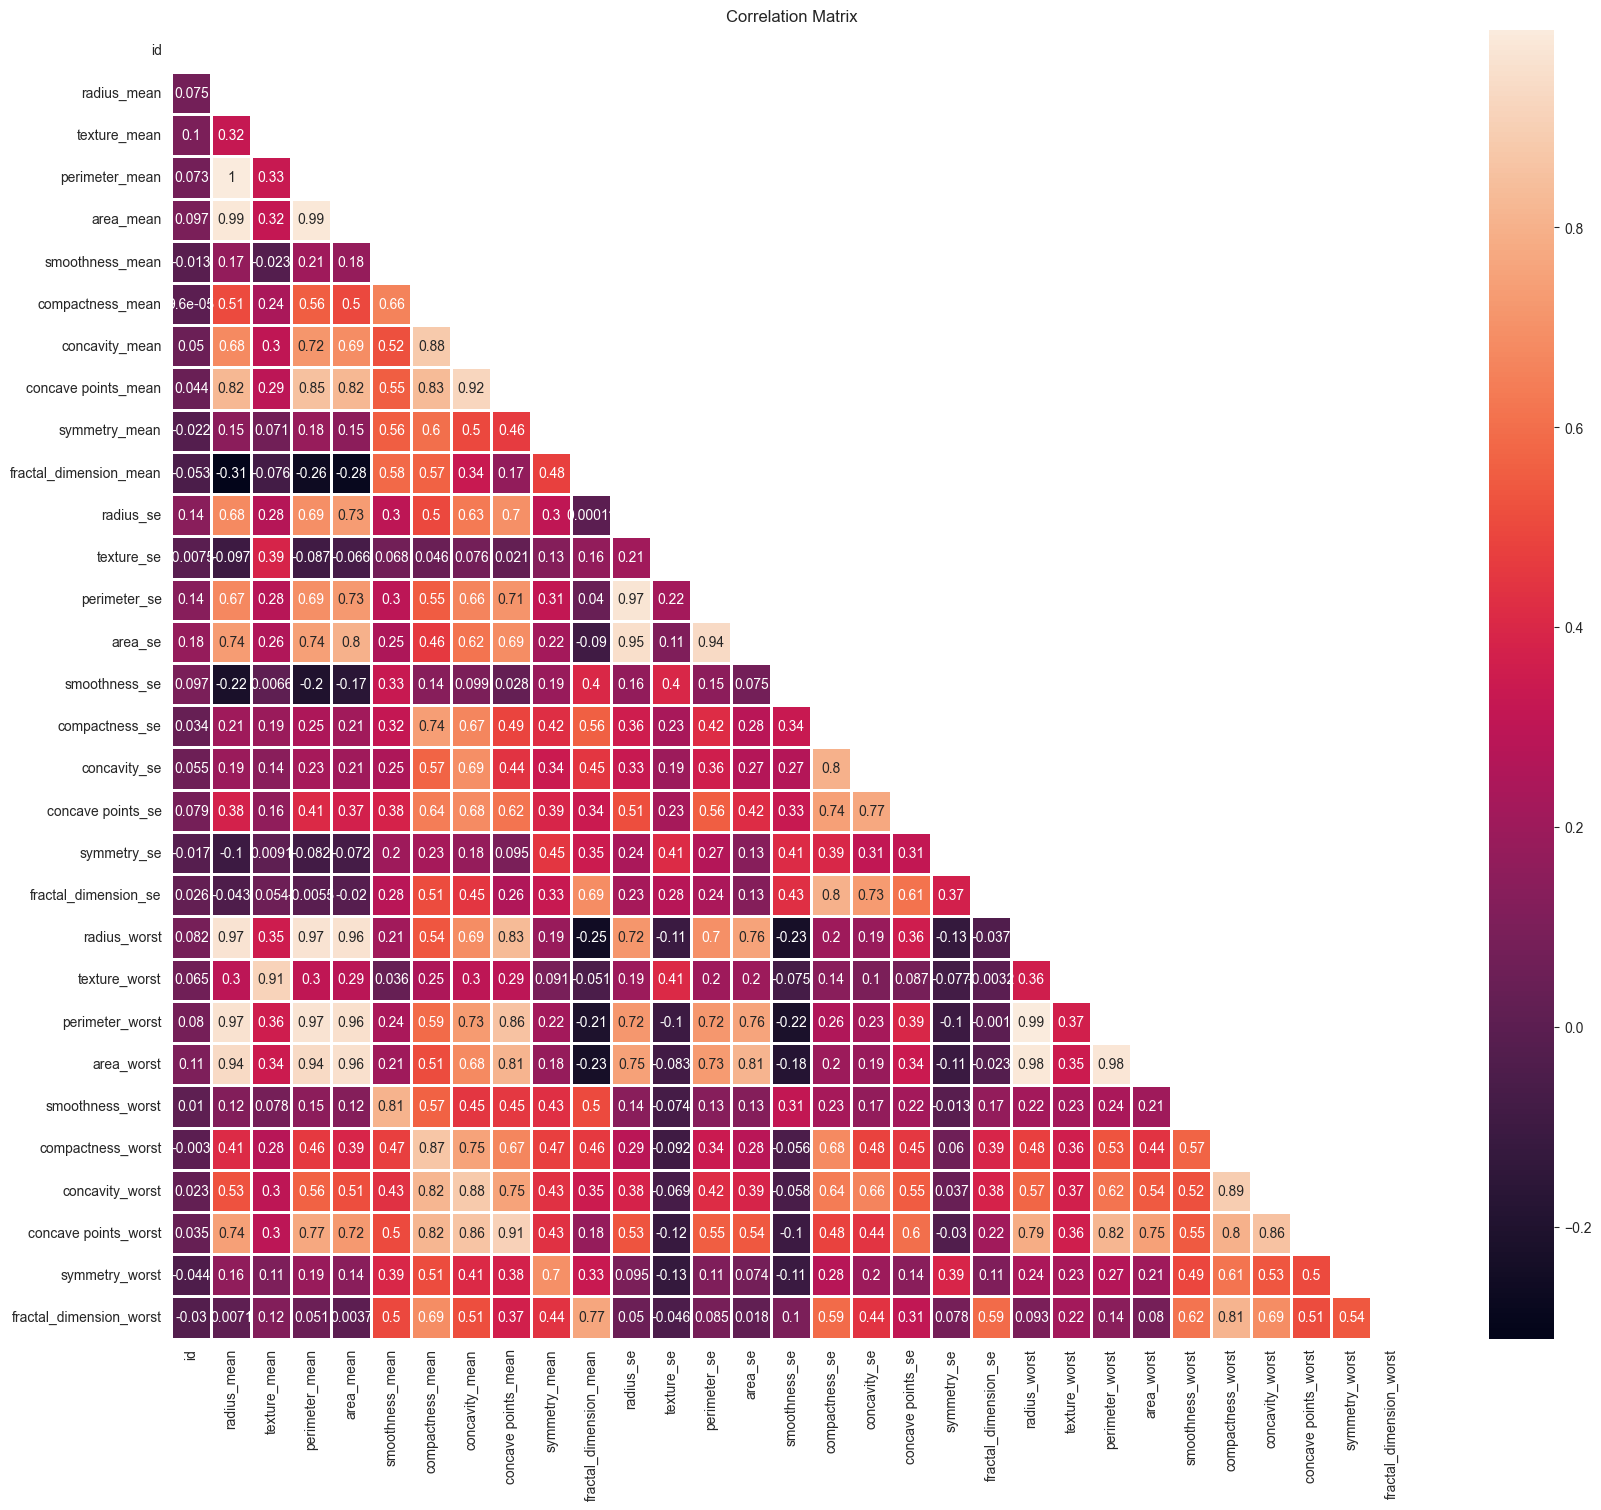

In [84]:
# feature examination (correlation matrix)
import warnings
warnings.filterwarnings('ignore') #remove warnings

plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix, linewidth=.8, cmap="rocket")
plt.title('Correlation Matrix')

# Determining Outliers

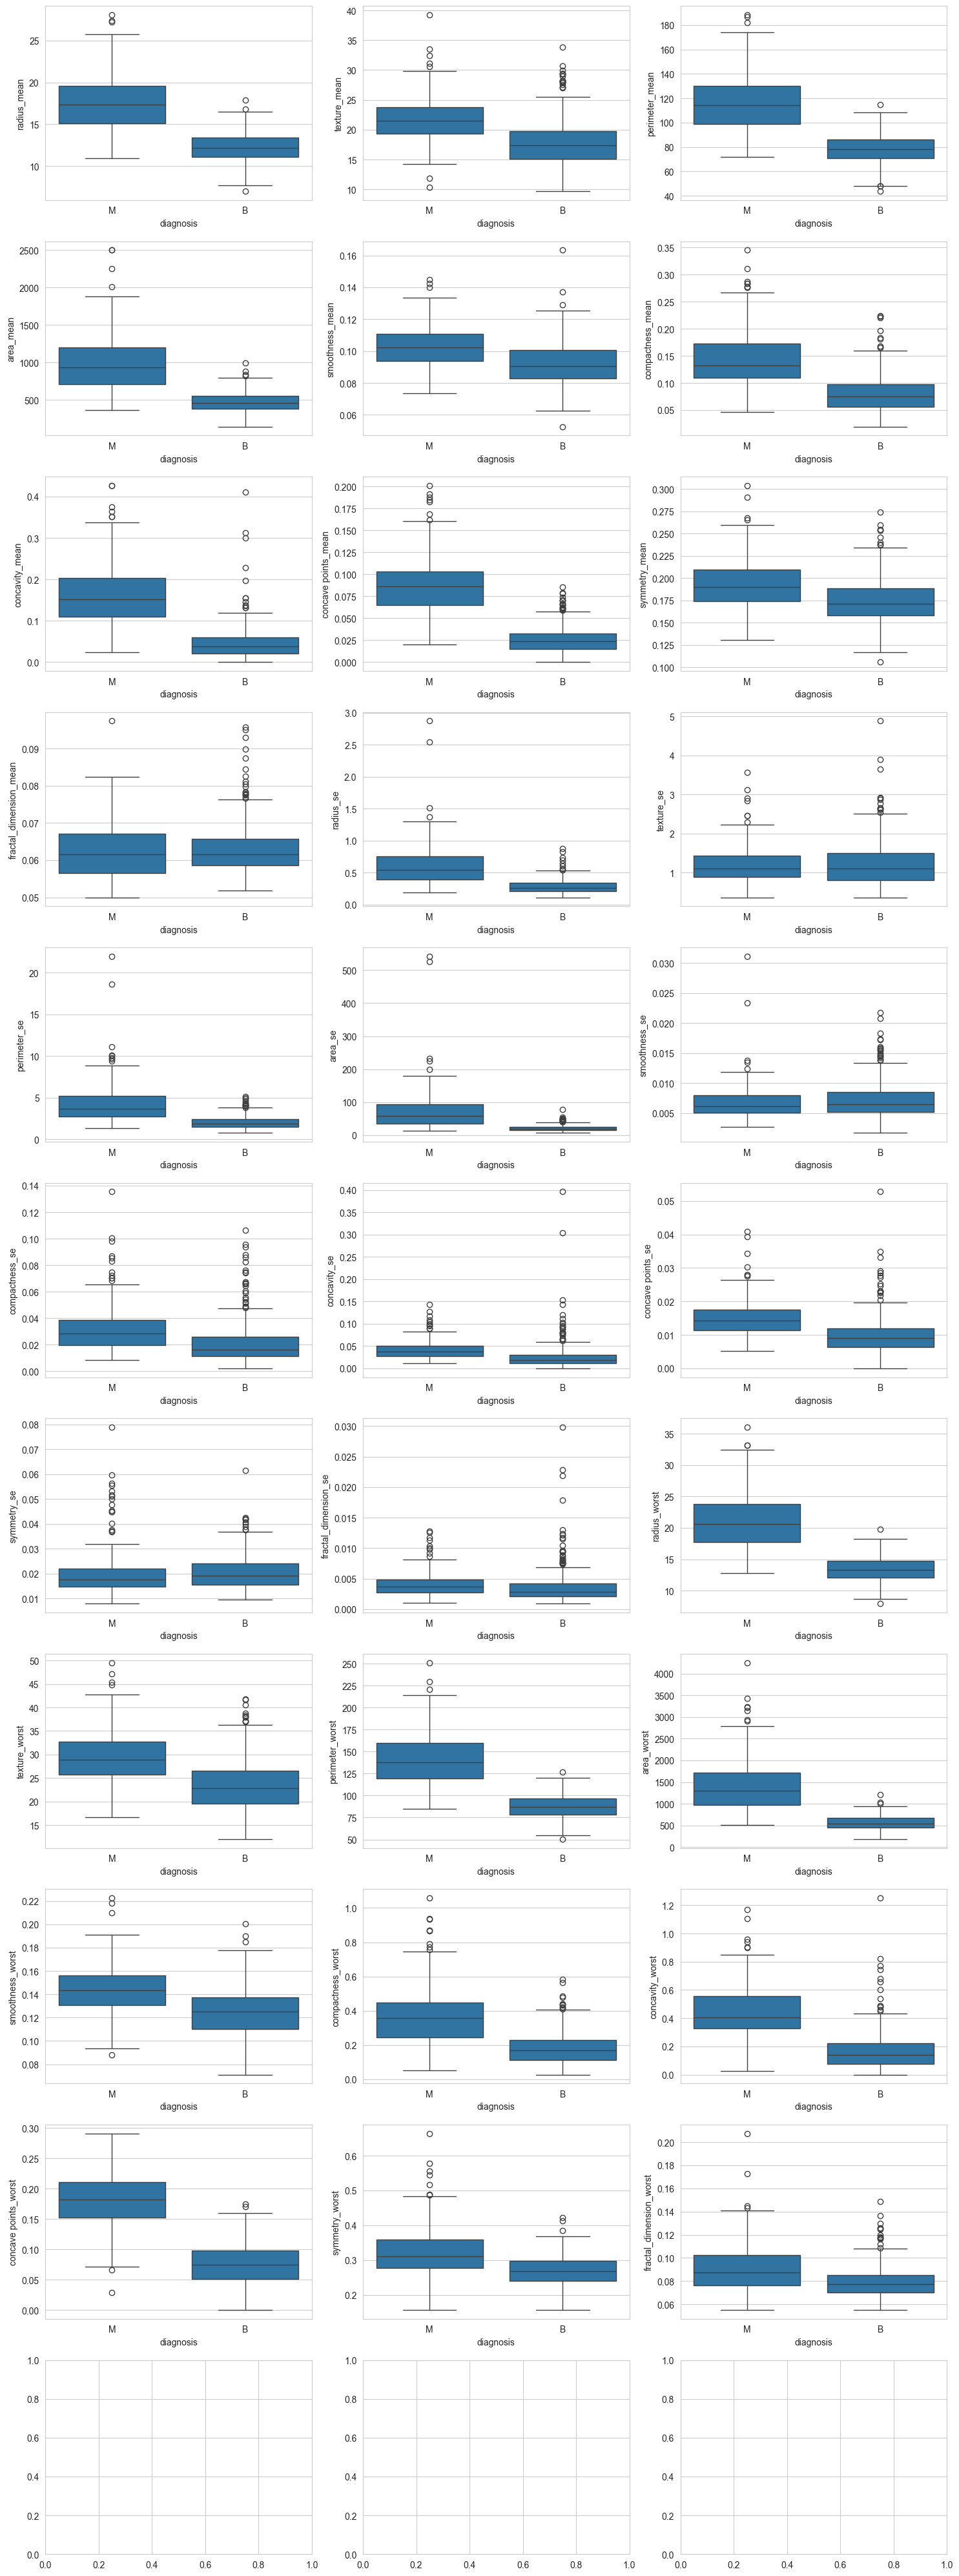

In [85]:
# Checking for outliers
warnings.filterwarnings('ignore') #remove warnings
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(15, 40))
for idx, feature in enumerate(data.columns[2:]):  # Skipping ID and diagnosis
    sns.boxplot(x='diagnosis', y=feature, data=data, ax=axes[idx // 3, idx % 3])
plt.tight_layout()


In [86]:

# Fit the LocalOutlierFactor model to your data
from sklearn.neighbors import LocalOutlierFactor
# Create an instance of the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# Fit the model
outliers = lof.fit_predict(data.drop(['id', 'diagnosis'], axis=1))
# Display the number of outliers
print("Number of outliers:", sum(outliers == -1))

Number of outliers: 57


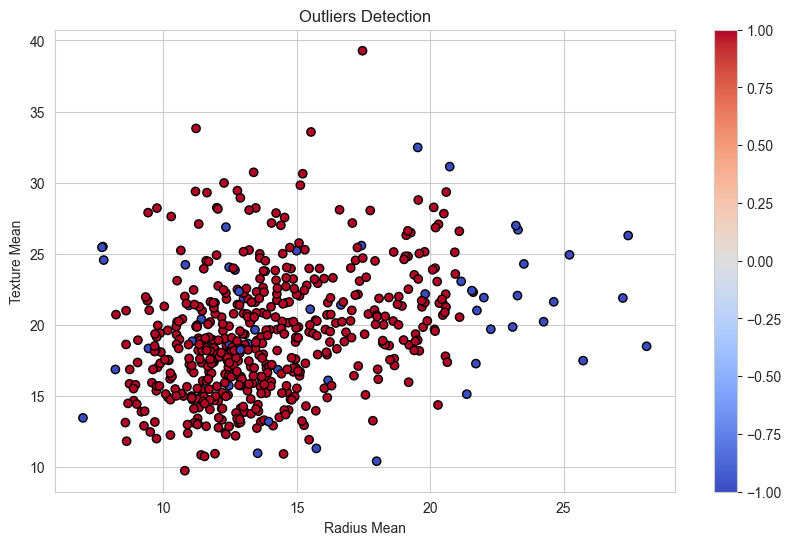

In [87]:
#plot outliers
plt.figure(figsize=(10, 6))
plt.scatter(data['radius_mean'], data['texture_mean'], c=outliers, cmap='coolwarm', edgecolors='k')
plt.colorbar() #map the outliers

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Outliers Detection')
plt.show()

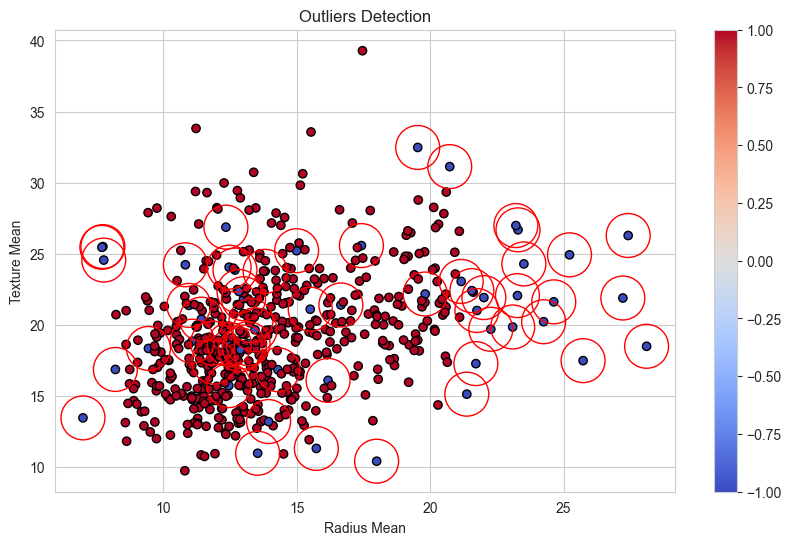

In [88]:
# Fit the LocalOutlierFactor model to your data
from sklearn.neighbors import LocalOutlierFactor
# Get the negative outlier factor scores
X_score = lof.fit_predict(data.drop(['id', 'diagnosis'], axis=1))
# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))
plt.scatter(data['radius_mean'], data['texture_mean'], c=X_score, cmap='coolwarm', edgecolors='k')
plt.colorbar()

# Calculate the radius for each point based on the outlier score
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

# Plot the points with sizes corresponding to the outlier score
plt.scatter(data['radius_mean'], data['texture_mean'], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Outliers Detection')
plt.show()

# Threshold for outlier detection
threshold = -2.5
# Get the outliers
outliers = data[X_score < threshold]

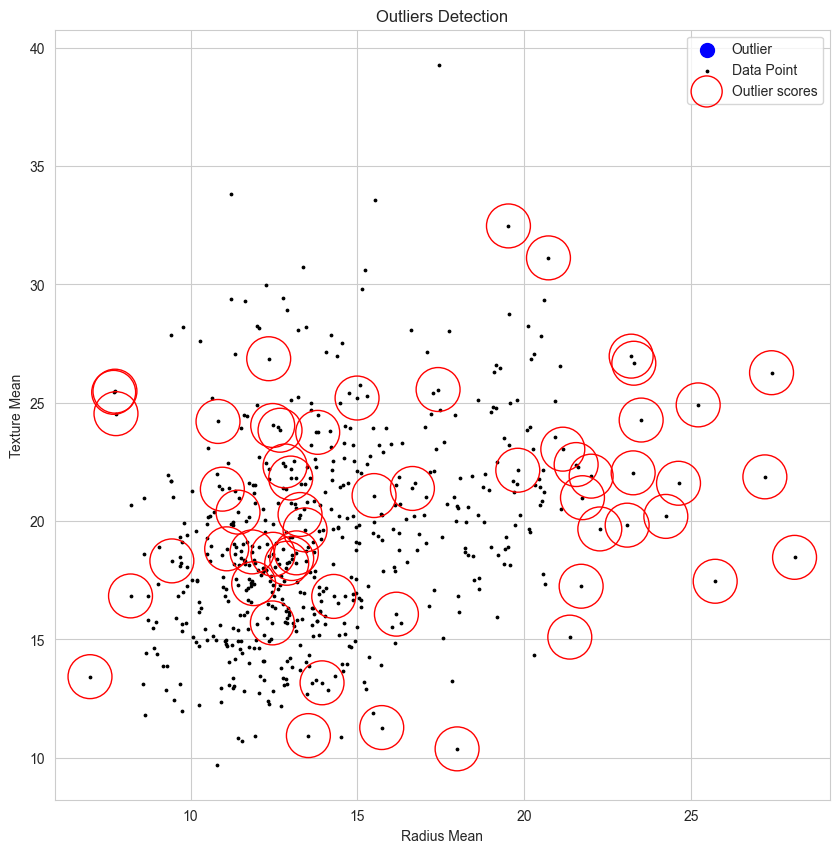

In [89]:
plt.figure(figsize=(10, 10))

# Plot outliers 
plt.scatter(outliers['radius_mean'], outliers['texture_mean'], color="b", s=100, label="Outlier")

# Plot all data points
plt.scatter(data['radius_mean'], data['texture_mean'], color="k", s=3, label="Data Point")

# Plot outlier scores with sizes corresponding to the outlier score
plt.scatter(data['radius_mean'], data['texture_mean'], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Outliers Detection')
plt.legend()
plt.show()

In [90]:
# Remove the outliers
data = data[X_score >= threshold]
# Display the shape of the data after removing outliers
data.shape

(569, 32)

# Step 3: Dimensionality Reduction
## Principal Component Analysis (PCA)
We'll apply PCA to reduce the dimensionality of the data while retaining most of the variance. This will help in visualizing the data and possibly improve the performance of the classification models

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


## Step 1: Standardize the Features

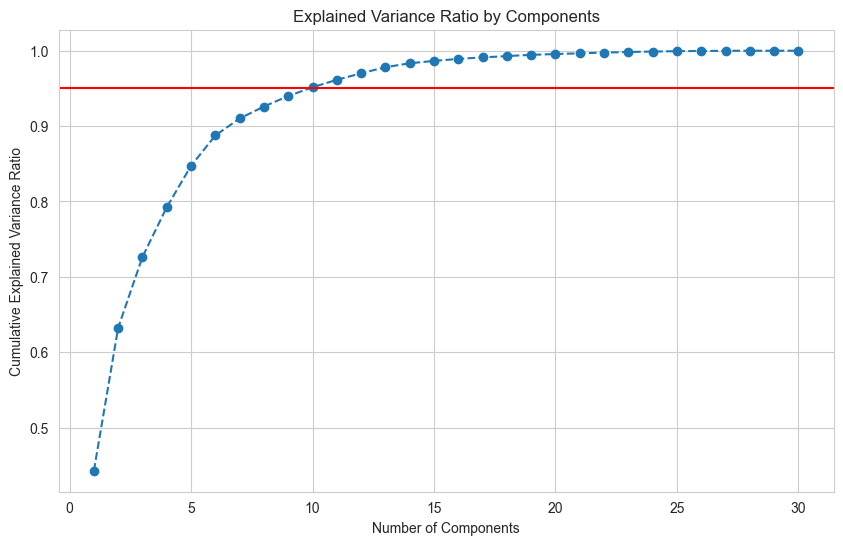

Text(30, 0.85, '10 components required for 95% variance')

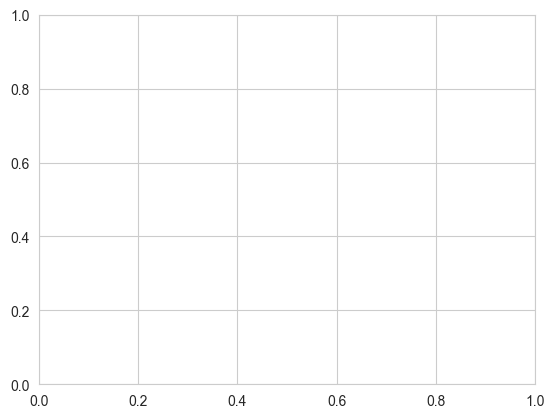

In [92]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data.iloc[:, 2:])

# Apply PCA without specifying the number of components
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Find the optimal number of components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid(True)
plt.show()

# Annotate the plot with the optimal number of components
plt.annotate(f'{optimal_components} components required for 95% variance', 
             xy=(optimal_components, cumulative_variance_ratio[optimal_components - 1]),
             xytext=(30, 0.85), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

## Step 2: Elbow Method
## Another way to find the optimal number of components using the elbow method


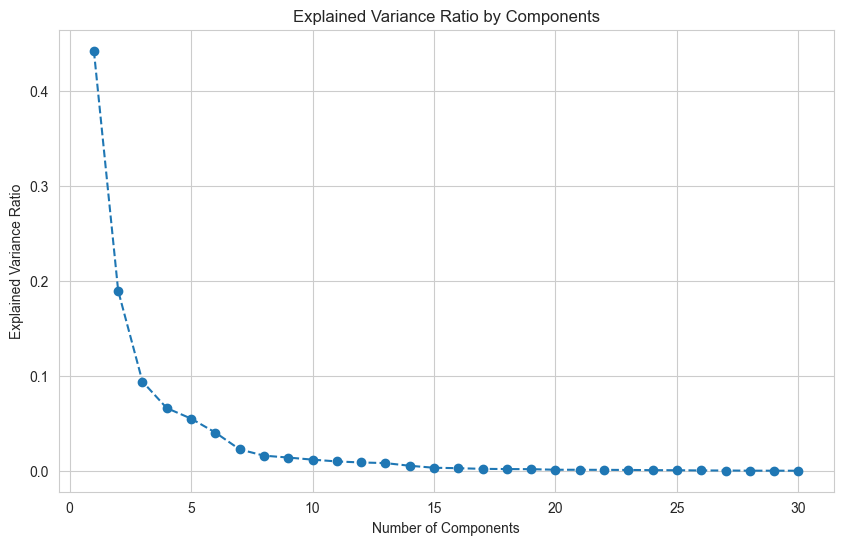

In [93]:
#plot a scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

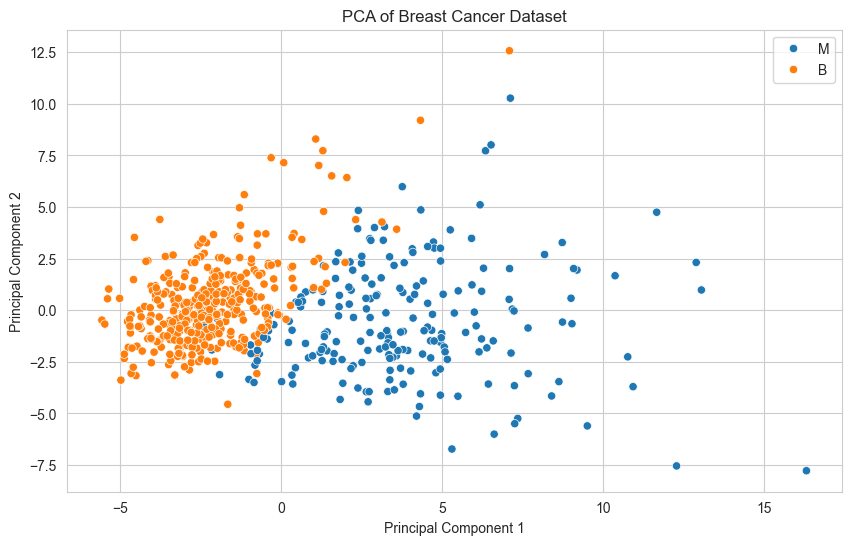

In [94]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_components)
features_pca = pca.fit_transform(features_scaled)

# Create a DataFrame to hold the principal components
principal_df = pd.DataFrame(data=features_pca, columns=[f'PC{i}' for i in range(1, optimal_components + 1)])
# Concatenate principal components with the target variable
final_df = pd.concat([principal_df, data['diagnosis']], axis=1)

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=final_df)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Step 4.1: Model Building
## We shall first use the original scaled features to build the model
We will build several machine learning models to classify the data. Models like Logistic Regression, Random Forest, SVM, Descion Tree and Gradient Boosting will be used.

In [95]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, data['diagnosis'], test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100)
}

# Train and evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")


Logistic Regression Accuracy: 0.98 (+/- 0.03)
Random Forest Accuracy: 0.96 (+/- 0.04)
Gradient Boosting Accuracy: 0.95 (+/- 0.03)


## Lets evaluate each model independently

In [96]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label='M'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Model:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


In [97]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, pos_label='M'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.96
Precision: 0.98
Recall: 0.93
F1 Score: 0.95
ROC AUC: 0.99

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


In [98]:
# Train a Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_gb, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_gb, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_gb, pos_label='M'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Model:
Accuracy: 0.96
Precision: 0.95
Recall: 0.93
F1 Score: 0.94
ROC AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


In [99]:
#Train an SVM model
from sklearn.svm import SVC

# Create an instance of the model
svm = SVC(probability=True)
# Fit the model
svm.fit(X_train, y_train)
# Predict the labels for the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_svm, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_svm, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, pos_label='M'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Model:
Accuracy: 0.97
Precision: 0.98
Recall: 0.95
F1 Score: 0.96
ROC AUC: 1.00

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


In [100]:
# Train a KNN model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model
knn = KNeighborsClassifier()
# Fit the model
knn.fit(X_train, y_train)
# Predict the labels for the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn, pos_label='M'):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model:
Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


In [101]:
# Train a Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the model
dt = DecisionTreeClassifier()
# Fit the model
dt.fit(X_train, y_train)
# Predict the labels for the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt, pos_label='M'):.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model:
Accuracy: 0.94
Precision: 0.91
Recall: 0.93
F1 Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114


# Step 4.2 Lets build a model using the PCA features
Models like Logistic Regression, Random Forest, SVM, Descion Tree and Gradient Boosting will be used.

In [102]:
# Prepare the data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, data['diagnosis'], test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
# Train and evaluate models using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_pca, y_train_pca, cv=5)
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    

Logistic Regression Accuracy: 0.98 (+/- 0.01)
Random Forest Accuracy: 0.95 (+/- 0.02)
Gradient Boosting Accuracy: 0.95 (+/- 0.03)
SVM Accuracy: 0.97 (+/- 0.03)
KNN Accuracy: 0.96 (+/- 0.04)
Decision Tree Accuracy: 0.93 (+/- 0.03)


# Step 5: Model Evaluation and Selection
We will evaluate the models based on accuracy, precision, recall, F1-score, and AUC-ROC and select the best performing model.

In [103]:
# Train a logistic regression model using PCA features
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train_pca)

# Predict the labels for the test set
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Evaluate the model
print("Logistic Regression Model with PCA:")
print(f"Accuracy: {accuracy_score(y_test_pca, y_pred_pca):.2f}")
print(f"Precision: {precision_score(y_test_pca, y_pred_pca, pos_label='M'):.2f}")
print(f"Recall: {recall_score(y_test_pca, y_pred_pca, pos_label='M'):.2f}")
print(f"F1 Score: {f1_score(y_test_pca, y_pred_pca, pos_label='M'):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test_pca, log_reg_pca.predict_proba(X_test_pca)[:, 1]):.2f}")

# Display classification report
print("\nClassification Report:")


Logistic Regression Model with PCA:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
ROC AUC: 1.00

Classification Report:


# Step 6: Interpretation and Reporting
We'll interpret the results, focusing on feature importance and model diagnostics to understand which features are most influential in predicting breast cancer diagnosis.

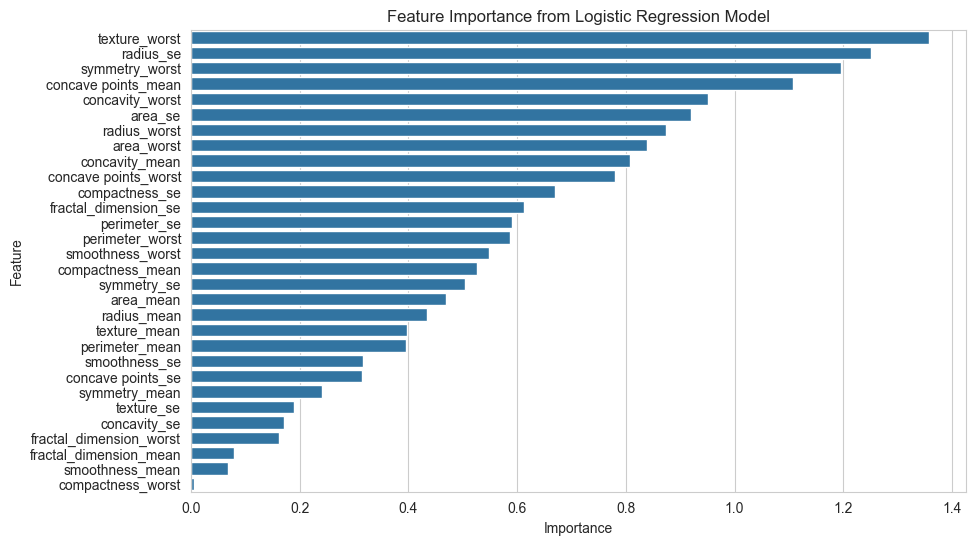

In [104]:
# Feature importance from Logistic Regression model
feature_importance = pd.DataFrame({'Feature': data.columns[2:], 'Importance': np.abs(log_reg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression Model')
plt.show()


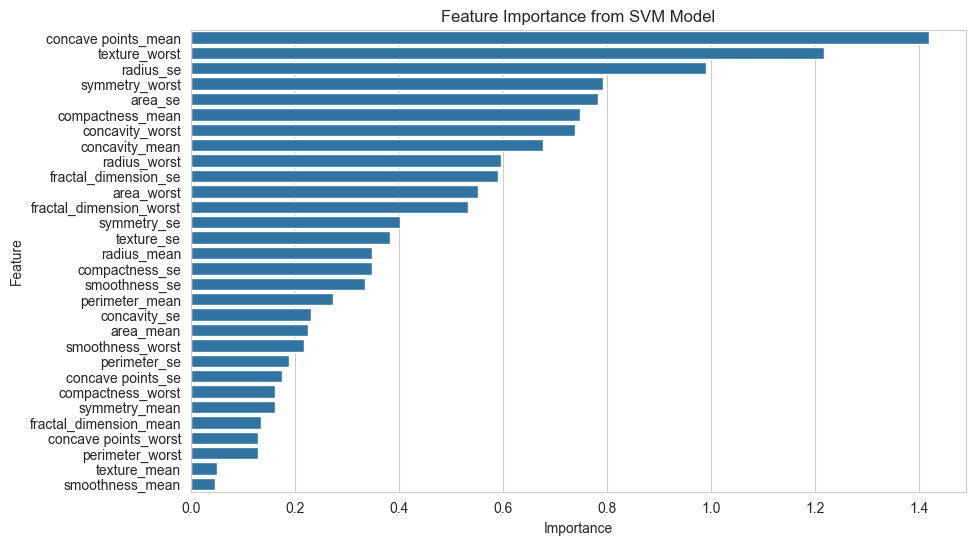

In [105]:
# Initialize and fit a linear SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Extract feature importances
feature_importance_svm = pd.DataFrame({'Feature': data.columns[2:], 'Importance': np.abs(svm.coef_[0])})
feature_importance_svm = feature_importance_svm.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm)
plt.title('Feature Importance from SVM Model')
plt.show()